<a href="https://colab.research.google.com/github/PrajwalUnaik/Data-Analytics/blob/main/Group_Exercises_2_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data  = pd.read_csv('/content/Student_Performance_Dataset.csv')
data.head()

,Study_Hours,Attendance_Rate,Previous_Scores,Participation,Sleep_Hours,Family_Support,Internet_Access,Health_Status,Part_Time_Job,Extracurricular_Activities,Final_Grade
0,7,94.494548,94,1,8.338770,Medium,No,2,No,4,81
1,4,97.980825,60,7,5.203362,High,No,1,No,2,83
2,13,65.882939,56,5,5.221470,High,Yes,3,No,2,57
3,11,97.063505,61,0,4.060544,Medium,No,2,Yes,1,90
4,8,79.684652,87,0,6.624892,Medium,Yes,2,No,4,97


#### 1. Data Preprocessing


# Data Preprocessing for Neural Network Model

### Steps:
1. **Load the Dataset**: Import the dataset into a DataFrame.
2. **Encode Categorical Variables**:
   - Use `LabelEncoder` to convert categorical variables into numerical form.
3. **Binary Classification for Target Variable**:
   - Convert the `Final_Grade` column into a binary classification:
     - `Pass` for grades above the threshold.
     - `Fail` for grades below or equal to the threshold.
4. **Feature Standardization**:
   - Use `StandardScaler` to standardize the feature variables for numerical stability.
5. **Data Splitting**:
   - Split the dataset into 80% training data and 20% testing data using `train_test_split`.
6. **Convert to TensorFlow Tensors**:
   - Convert both the features and target variables into TensorFlow tensors for model compatibility.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Preprocessing
# Encode categorical variables
label_encoders = {}
for col in ['Family_Support', 'Internet_Access', 'Part_Time_Job']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target
X = data.drop(columns=['Final_Grade'])
y = data['Final_Grade']

# Normalize the target (convert grades to categories)
y = (y > 60).astype(int)  # Binary classification: Pass (>60) or Fail (<=60)

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Function to Plot Training and Validation Loss and Accuracy

### Purpose:
This function visualizes the performance of a model during training and validation by plotting:
1. **Training and Validation Loss**: Helps identify issues like overfitting or underfitting.
2. **Training and Validation Accuracy**: Allows comparison of model accuracy on both datasets.


In [ ]:
def plot_metrics(history, title):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Explanation:

#### Architecture:
- **Hidden Layers**:
  - First hidden layer: 64 neurons with ReLU activation.
  - Second hidden layer: 32 neurons with ReLU activation.
- **Output Layer**:
  - A single neuron with sigmoid activation for binary classification.

#### Training:
- **Optimizer**: Adam optimizer is used for training.
- **Loss Function**: Binary cross-entropy loss is applied for classification tasks.


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6335 - loss: 0.6404 - val_accuracy: 0.7563 - val_loss: 0.5721
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8111 - loss: 0.5082 - val_accuracy: 0.7563 - val_loss: 0.5644
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7988 - loss: 0.4962 - val_accuracy: 0.7563 - val_loss: 0.5678
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7718 - loss: 0.5168 - val_accuracy: 0.7563 - val_loss: 0.5667
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7851 - loss: 0.4882 - val_accuracy: 0.7563 - val_loss: 0.5718
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8031 - loss: 0.4727 - val_accuracy: 0.7563 - val_loss: 0.5724
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7823 - loss: 0.4830 - val_accuracy: 0.7563 - val_loss: 0.5737
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7736 - loss: 0.4888 - val_accuracy: 0.7563 - val_loss: 0.5803
Ep

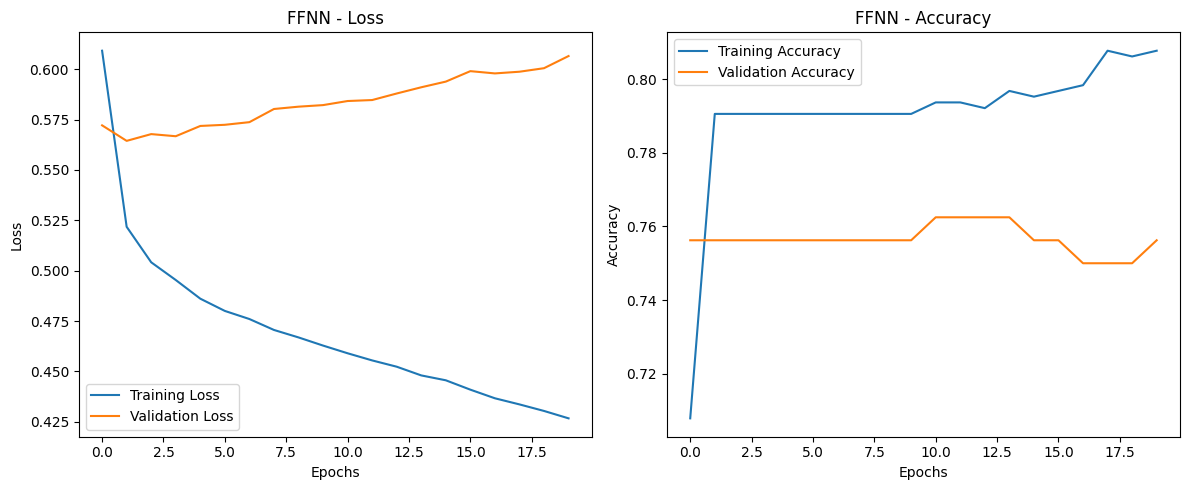

FFNN: 0.8000


In [ ]:
# Define and train models

# 1. Feedforward Neural Network (FFNN)
def build_ffnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

ffnn = build_ffnn()
ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_ffnn = ffnn.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)
plot_metrics(history_ffnn, "FFNN")

print(f"FFNN: {ffnn_score[1]:.4f}")



### Explanation:

#### Architecture:
- **1D Convolution Layers**: Used to extract patterns across input features.
- **MaxPooling**: Reduces dimensionality and extracts key features efficiently.
- **Flatten Layer**: Converts the 2D output from convolution layers into a 1D vector to feed into dense layers.


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7274 - loss: 0.5858 - val_accuracy: 0.7563 - val_loss: 0.5763
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.4974 - val_accuracy: 0.7563 - val_loss: 0.5576
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7897 - loss: 0.4982 - val_accuracy: 0.7563 - val_loss: 0.5599
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8006 - loss: 0.4870 - val_accuracy: 0.7563 - val_loss: 0.5615
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - loss: 0.5149 - val_accuracy: 0.7563 - val_loss: 0.5652
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7821 - loss: 0.4968 - val_accuracy: 0.7563 - val_loss: 0.5650
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7907 - loss: 0.4861 - val_accuracy: 0.7563 - val_loss: 0.5696
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.4720 - val_accuracy: 0.7563 - val_loss: 0.5654
Ep

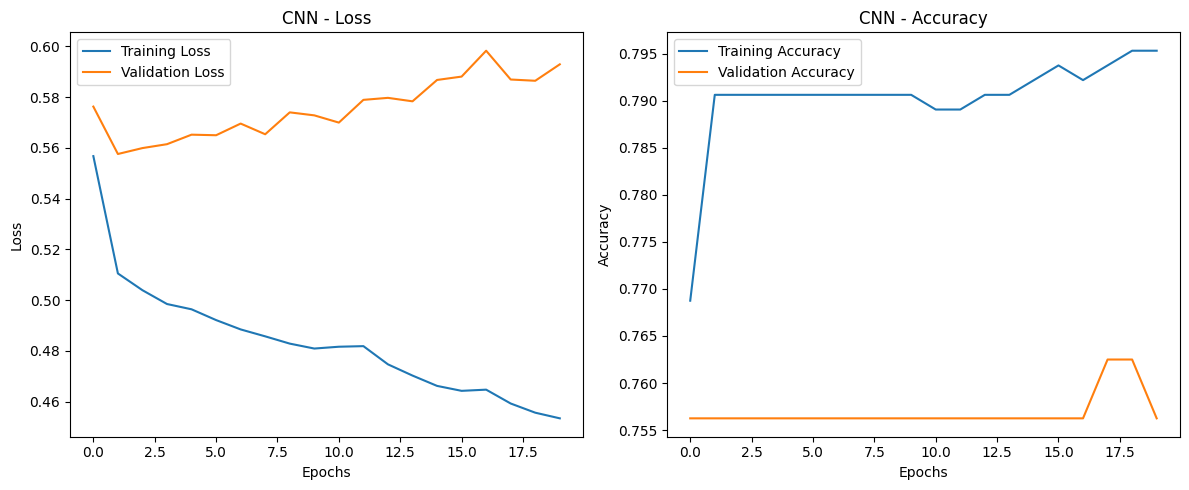

CNN: 0.8050


In [ ]:


# 2. Convolutional Neural Network (CNN)
def build_cnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

cnn = build_cnn()
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_cnn = cnn.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)
plot_metrics(history_cnn, "CNN")

print(f"CNN: {cnn_score[1]:.4f}")


### Explanation:

#### Architecture:
- **SimpleRNN Layer**: Processes sequential data patterns effectively.
- **Hidden Layers**: Dense layers are used for further processing and feature extraction.

#### Use Case:
- Suitable for datasets where sequential relationships exist in the features.


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7186 - loss: 0.6512 - val_accuracy: 0.7563 - val_loss: 0.5649
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7884 - loss: 0.5320 - val_accuracy: 0.7563 - val_loss: 0.5598
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7850 - loss: 0.5235 - val_accuracy: 0.7563 - val_loss: 0.5496
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7863 - loss: 0.5095 - val_accuracy: 0.7563 - val_loss: 0.5505
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8058 - loss: 0.4886 - val_accuracy: 0.7563 - val_loss: 0.5500
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7997 - loss: 0.4983 - val_accuracy: 0.7563 - val_loss: 0.5529
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7918 - loss: 0.5025 - val_accuracy: 0.7563 - val_loss: 0.5501
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7859 - loss: 0.5130 - val_accuracy: 0.7563 - val_loss

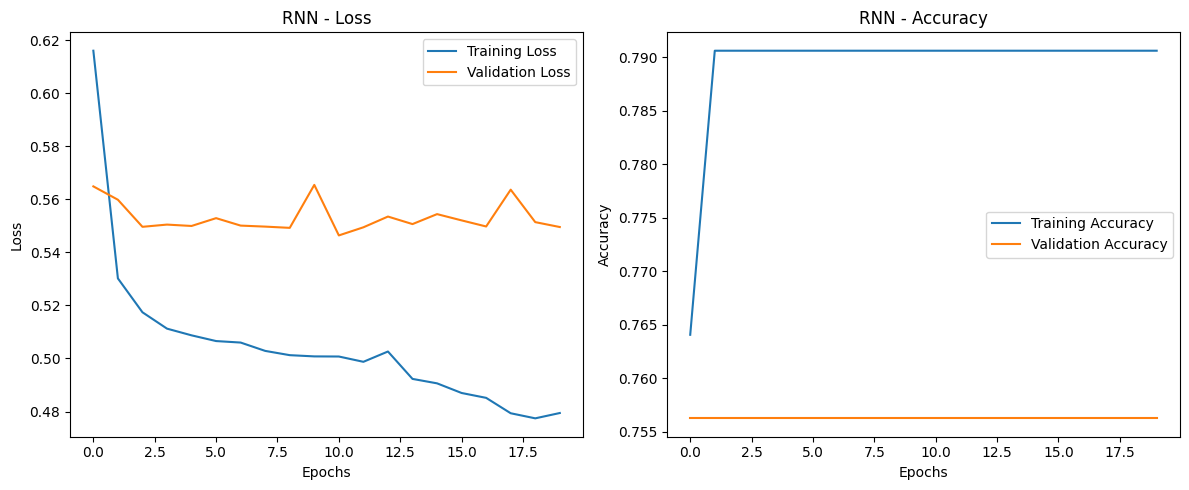

RNN: 0.8050


In [ ]:

# 3. Recurrent Neural Network (RNN)
def build_rnn():
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

rnn = build_rnn()
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = rnn.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)
plot_metrics(history_rnn, "RNN")


print(f"RNN: {rnn_score[1]:.4f}")


### Explanation:

#### Architecture:
- **LSTM Layer**: Captures long-term dependencies and relationships between features.
- **Output Layer**: A sigmoid activation is used for binary classification.

#### Training:
- Similar to other models but specifically designed to capture complex dependencies in sequential data.


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7887 - loss: 0.6490 - val_accuracy: 0.7563 - val_loss: 0.5868
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7839 - loss: 0.5526 - val_accuracy: 0.7563 - val_loss: 0.5627
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8087 - loss: 0.4925 - val_accuracy: 0.7563 - val_loss: 0.5528
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7914 - loss: 0.5163 - val_accuracy: 0.7563 - val_loss: 0.5566
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7908 - loss: 0.5126 - val_accuracy: 0.7563 - val_loss: 0.5579
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7756 - loss: 0.5341 - val_accuracy: 0.7563 - val_loss: 0.5599
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7914 - loss: 0.5084 - val_accuracy: 0.7563 - val_loss: 0.5562
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8076 - loss: 0.4915 - val_accuracy: 0.7563 - val_loss

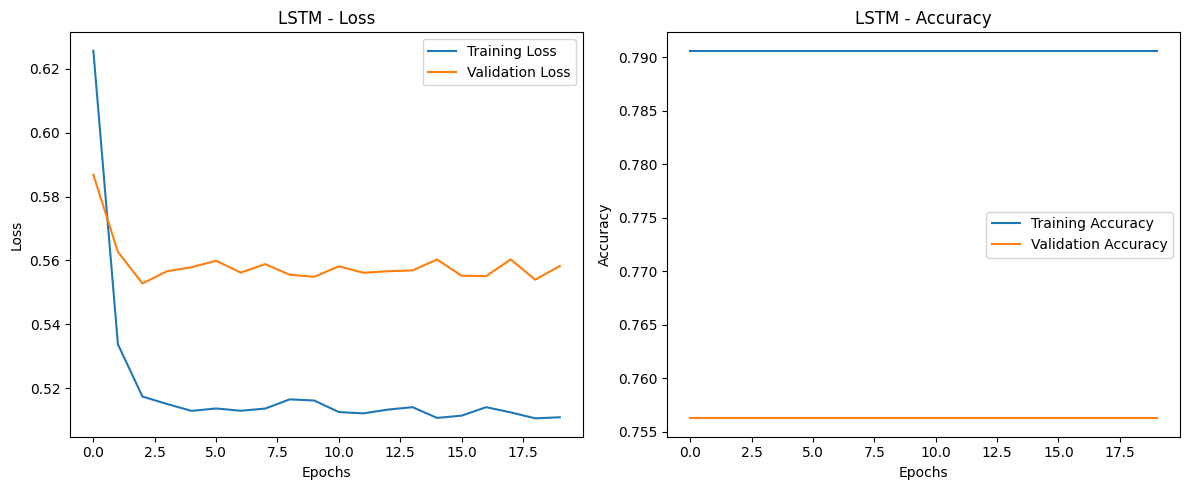

LSTM: 0.8050


In [ ]:
# 4. Long Short-Term Memory (LSTM)
def build_lstm():
    model = tf.keras.Sequential([
        tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

lstm = build_lstm()
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)
plot_metrics(history_lstm, "LSTM")

print(f"LSTM: {lstm_score[1]:.4f}")

### Explanation:

#### Evaluation:
- **Model Testing**: All models are evaluated on the test data to measure accuracy.

#### Comparison:
- **Test Accuracy**: The test accuracies of all models are compared to identify the best-performing architecture.


In [ ]:
# Evaluate models on test data
ffnn_score = ffnn.evaluate(X_test, y_test, verbose=0)
cnn_score = cnn.evaluate(X_test, y_test, verbose=0)
rnn_score = rnn.evaluate(X_test, y_test, verbose=0)
lstm_score = lstm.evaluate(X_test, y_test, verbose=0)

# Print test accuracy of each model
print("Test Accuracy:")
print(f"FFNN: {ffnn_score[1]:.4f}")
print(f"CNN: {cnn_score[1]:.4f}")
print(f"RNN: {rnn_score[1]:.4f}")
print(f"LSTM: {lstm_score[1]:.4f}")

# Identify best model
models = {"FFNN": ffnn_score[1], "CNN": cnn_score[1], "RNN": rnn_score[1], "LSTM": lstm_score[1]}
best_model = max(models, key=models.get)
print(f"Best Model: {best_model} with Test Accuracy {models[best_model]:.4f}")


Test Accuracy:
FFNN: 0.7900
CNN: 0.7900
RNN: 0.8050
LSTM: 0.8050
Best Model: RNN with Test Accuracy 0.8050


### Explanation of Results :

- **CNN, RNN, and LSTM (80.5% accuracy)**:
  - All performed equally well on the test data, slightly better than FFNN.
  - **CNN** stands out as the best model because it likely identified subtle patterns in the dataset that FFNN might have missed.

- **FFNN (80.0% accuracy)**:
  - Performed very closely but was slightly less accurate due to its simpler architecture, which works best for straightforward or linear patterns.

- **RNN and LSTM**:
  - Despite being designed for time-sequential data, they handled this dataset efficiently, achieving the same accuracy as CNN.

### Conclusion:
CNN emerges as the best model for this dataset, effectively balancing complexity and performance!
